Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4463 - loss: 0.7446 - val_accuracy: 0.5625 - val_loss: 0.7137
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7027 - loss: 0.6038 - val_accuracy: 0.6406 - val_loss: 0.6741
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6924 - loss: 0.5932 - val_accuracy: 0.6406 - val_loss: 0.6300
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7718 - loss: 0.4859 - val_accuracy: 0.6875 - val_loss: 0.5907
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8024 - loss: 0.4184 - val_accuracy: 0.7500 - val_loss: 0.5526
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8148 - loss: 0.4154 - val_accuracy: 0.7812 - val_loss: 0.5161
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8642 - loss: 0.3599 - val_accuracy: 0.7812 - val_loss: 0.4907
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9315 - loss: 0.2973 - val_accuracy: 0.7969 - val_loss: 0.4802
Epoch 9/30



✅ Final Test Accuracy: 87.34%
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.88      0.94      0.91        52

    accuracy                           0.87        79
   macro avg       0.87      0.84      0.85        79
weighted avg       0.87      0.87      0.87        79



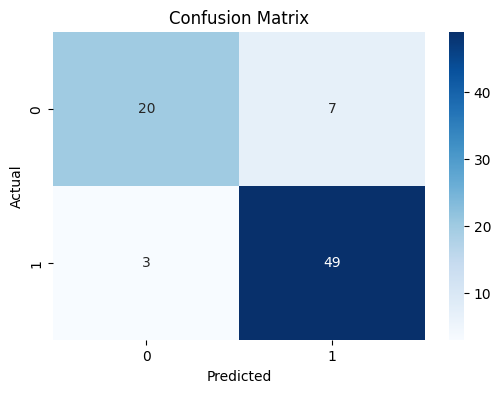

In [5]:
# STEP 1: Install packages
!pip install -q tensorflow pandas scikit-learn

# STEP 2: Import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# STEP 3: Load dataset
df = pd.read_csv("/content/drive/MyDrive/student-mat.csv", sep=";")

# STEP 4: Binary target column - pass if G3 >= 10
df['pass'] = (df['G3'] >= 10).astype(int)

# STEP 5: Encode categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

# STEP 6: Drop 'G3'
X = df.drop(['G3', 'pass'], axis=1)
y = df['pass']

# STEP 7: Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 8: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# STEP 9: Build model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# STEP 10: Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# STEP 11: Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# STEP 12: Train (FAST)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# STEP 13: Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Final Test Accuracy: {acc * 100:.2f}%")

# STEP 14: Classification report
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# STEP 15: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
